In [ ]:
# kNN on MNIST using scikit-learn
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)

X_train = X_train.reshape(len(X_train), -1)
X_test  = X_test.reshape(len(X_test), -1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test  = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"k-NN test accuracy: {acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
k-NN test accuracy: 0.9460


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

model = LogisticRegression(max_iter=200, multi_class='auto')
model.fit(X_train_s, y_train)

y_pred = model.predict(X_test_s)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nAccuracy:", accuracy_score(y_test, y_pred))



Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Accuracy: 0.9333333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
#Predicting temperature, precipitation, and other weather metrics based on meteorological data.
import kagglehub
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

dataset_path = kagglehub.dataset_download("shivamshinde1904/weather-data2000-2023")
print("Dataset path:", dataset_path)

csv_files = list(Path(dataset_path).glob("*.csv"))

df = pd.read_csv(csv_files[0])
print("Columns:", df.columns.tolist())
print(df.head())

target_col = "Temp_Mean"
drop_cols = ["Country", "Date", target_col]
X = df.drop(columns=drop_cols, errors="ignore")
y = df[target_col]
X = X.fillna(method="ffill").fillna(method="bfill")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"Test RMSE: {rmse:.2f}")

Using Colab cache for faster access to the 'weather-data2000-2023' dataset.
Dataset path: /kaggle/input/weather-data2000-2023
Columns: ['Country', 'Date', 'Temp_Max', 'Temp_Min', 'Temp_Mean', 'Precipitation_Sum', 'Windspeed_Max', 'Windgusts_Max', 'Sunshine_Duration']
        Country        Date  Temp_Max  Temp_Min  Temp_Mean  Precipitation_Sum  \
0  South_Africa  01-01-2000      28.7      14.0       22.0                0.0   
1  South_Africa  02-01-2000      27.1      13.8       19.7                0.0   
2  South_Africa  03-01-2000      30.8      13.4       22.8                0.0   
3  South_Africa  04-01-2000      32.1      19.2       24.6               11.2   
4  South_Africa  05-01-2000      27.9      18.4       23.1                2.5   

   Windspeed_Max  Windgusts_Max  Sunshine_Duration  
0           28.5           41.0           46920.60  
1           41.0           64.1           46889.45  
2           25.5           42.8           46837.41  
3           23.7           41.8  

/tmp/ipython-input-3667041018.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method="ffill").fillna(method="bfill")


Test RMSE: 0.56


In [ ]:
#House price prediction with simple linear regression and multiple linear regression
import kagglehub
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dataset_path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
print("Dataset folder:", dataset_path)

csv_files = list(Path(dataset_path).glob("*.csv"))
df = pd.read_csv(csv_files[0])
print("Columns:", df.columns.tolist())

target = "price"
y = df[target]
X = df.drop(columns=[target])

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[ ("imputer", SimpleImputer(strategy="most_frequent")),("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, num_cols),("cat", categorical_transformer, cat_cols)])

model = Pipeline(steps=[("preprocess", preprocessor),("regressor", Ridge(alpha=1.0, random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae  = mean_absolute_error(y_test, preds)
r2   = r2_score(y_test, preds)
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

Using Colab cache for faster access to the 'housing-prices-dataset' dataset.
Dataset folder: /kaggle/input/housing-prices-dataset
Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
RMSE : 1325417.46
R²   : 0.652


In [ ]:
#Classifying patient data to predict the presence of a disease, such as a tumor being malignant or benign.
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import kagglehub
from pathlib import Path


dataset_path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
print("Dataset folder:", dataset_path)

csv_files = list(Path(dataset_path).glob("*.csv"))

data = pd.read_csv(csv_files[0])

label_column = "diagnosis"
X = data.drop(label_column, axis=1)
y = data[label_column]

# Drop the 'Unnamed: 32' column as it seems to be empty
if 'Unnamed: 32' in X.columns:
    X = X.drop('Unnamed: 32', axis=1)

# Check for and handle any remaining missing values (if any)
X = X.fillna(method='ffill').fillna(method='bfill')


X_train, X_temp, y_train, y_temp = train_test_split( X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Dataset folder: /kaggle/input/breast-cancer-wisconsin-data


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Test Accuracy: 0.9736842105263158


100%|██████████| 1.39k/1.39k [00:00<00:00, 1.93MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hanaksoy/customer-purchasing-behaviors/versions/1
Files in dataset folder: ['Customer Purchasing Behaviors.csv']

Dataset Preview:
   user_id  age  annual_income  purchase_amount  loyalty_score region  \
0        1   25          45000              200            4.5  North   
1        2   34          55000              350            7.0  South   
2        3   45          65000              500            8.0   West   
3        4   22          30000              150            3.0   East   
4        5   29          47000              220            4.8  North   

   purchase_frequency  
0                  12  
1                  18  
2                  22  
3                  10  
4                  13  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  --

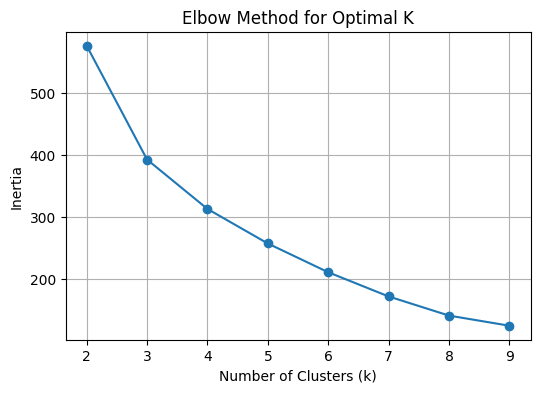


Cluster Counts:
Cluster
3    67
1    60
0    56
2    55
Name: count, dtype: int64


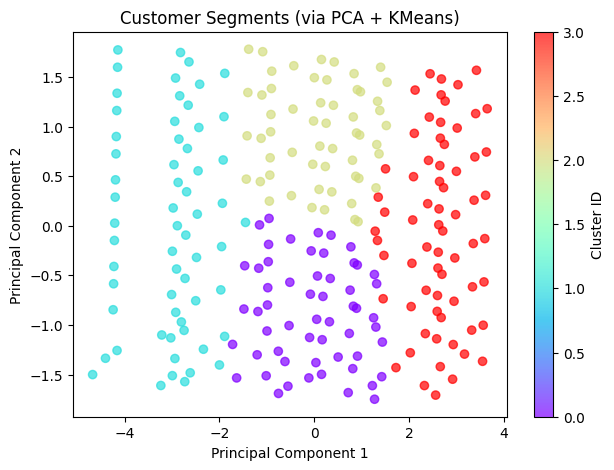


Cluster Summary (Average Traits per Group):
            user_id        age  annual_income  purchase_amount  loyalty_score  \
Cluster                                                                         
0         58.678571  37.821429   57696.428571       426.785714       6.910714   
1        111.716667  26.850000   42066.666667       232.166667       4.116667   
2        184.000000  38.109091   57963.636364       433.090909       6.967273   
3        124.358209  50.447761   70447.761194       591.791045       8.952239   

         purchase_frequency  
Cluster                      
0                 19.892857  
1                 13.566667  
2                 20.018182  
3                 25.119403  


In [10]:
# Grouping customers with similar traits or purchasing behaviors to create target marketing strategies.
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

path = kagglehub.dataset_download("hanaksoy/customer-purchasing-behaviors")
print("Path to dataset files:", path)
print("Files in dataset folder:", os.listdir(path))

file_path = os.path.join(path, "Customer Purchasing Behaviors.csv")
df = pd.read_csv(file_path)

print("\nDataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
numeric_df = df.select_dtypes(include=['float64', 'int64'])
print("\nNumeric features selected for clustering:")
print(numeric_df.columns.tolist())
numeric_df = numeric_df.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

df['Cluster'] = cluster_labels

print("\nCluster Counts:")
print(df['Cluster'].value_counts())
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(7, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
            c=cluster_labels, cmap='rainbow', alpha=0.7)
plt.title('Customer Segments (via PCA + KMeans)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster ID')
plt.show()
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print("\nCluster Summary (Average Traits per Group):")
print(cluster_summary)


In [8]:
#   Spam email detection using Naive Bayes classifier
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

path = kagglehub.dataset_download("venky73/spam-mails-dataset")
print(" Path to dataset files:", path)
print(" Files in dataset folder:", os.listdir(path))

file_path = os.path.join(path, "spam_ham_dataset.csv")
df = pd.read_csv(file_path, encoding='latin-1')
print("\n Columns before rename:", df.columns.tolist())
print(df.head())

if 'label' in df.columns and 'text' in df.columns:
    df.rename(columns={'text': 'message'}, inplace=True)
else:
    raise ValueError(" Could not find expected columns. Please check column names.")

df = df[['label', 'message']]
df.dropna(subset=['label', 'message'], inplace=True)

print("\n Data loaded successfully!")
print(df.head())

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

print("\n Model Evaluation Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

samples = [
    "Congratulations! You've won a $1000 gift card. Click the link to claim now!",
    "Reminder: your meeting starts at 3 PM today.",
    "URGENT! Your bank account has been compromised. Verify immediately!"
]

predictions = text_clf.predict(samples)

print("\nSample Predictions:")
for msg, label in zip(samples, predictions):
    print(f"Message: {msg}\n→ Predicted: {label}\n")


Using Colab cache for faster access to the 'spam-mails-dataset' dataset.
 Path to dataset files: /kaggle/input/spam-mails-dataset
 Files in dataset folder: ['spam_ham_dataset.csv']

 Columns before rename: ['Unnamed: 0', 'label', 'text', 'label_num']
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  

 Data loaded successfully!
  label                                            message
0   ham  Subject: enron methanol ; meter # : 988291\r\n...
1   ham  Subject: hpl nom for january 9 , 2001\r\n( see...
2   ham  

SVC Accuracy: 92.98%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        42
           1       0.92      0.97      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



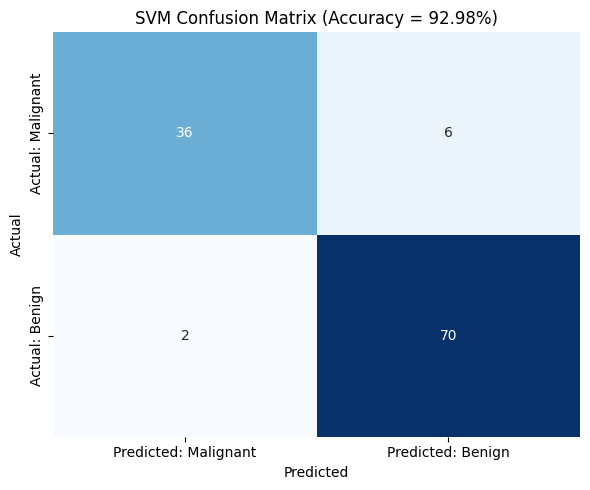

In [9]:
#SVC on breast cancer dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

svc = SVC(kernel='rbf', C=1.0, gamma='scale')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"SVC Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: Malignant', 'Predicted: Benign'],
            yticklabels=['Actual: Malignant', 'Actual: Benign'])
plt.title(f'SVM Confusion Matrix (Accuracy = {acc*100:.2f}%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


Episode 200/2000 - reward: 92.0 - epsilon: 0.367
Episode 400/2000 - reward: 82.0 - epsilon: 0.135
Episode 600/2000 - reward: 92.0 - epsilon: 0.050
Episode 800/2000 - reward: 92.0 - epsilon: 0.050
Episode 1000/2000 - reward: 92.0 - epsilon: 0.050
Episode 1200/2000 - reward: 85.0 - epsilon: 0.050
Episode 1400/2000 - reward: 92.0 - epsilon: 0.050
Episode 1600/2000 - reward: 90.0 - epsilon: 0.050
Episode 1800/2000 - reward: 92.0 - epsilon: 0.050
Episode 2000/2000 - reward: 92.0 - epsilon: 0.050


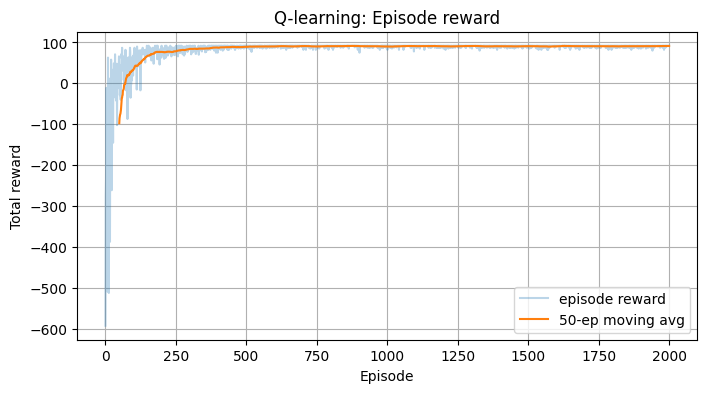


Result of greedy policy run:
Reached goal: True
Total reward: 92.0
Path length: 10
Path: [(4, 0), (3, 0), (2, 0), (1, 0), (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]

Maze with '*' showing the executed path:
* * * * * G
* # # . # .
* . . . # .
* # . # . .
S . . . . .

Policy (arrows):
> > > > > G
^ # # ^ # ^
^ > > ^ # ^
^ # ^ # v ^
S > ^ < < <


In [12]:
# Learn a robot to navigate a maze or an environment with obstacles to reach a goal.
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import deque
MAZE = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
])

START = (4, 0)
GOAL  = (0, 5)
class GridEnv:
    def __init__(self, maze, start, goal):
        self.maze = maze
        self.start = start
        self.goal = goal
        self.n_rows, self.n_cols = maze.shape
        self.state = start

    def reset(self):
        self.state = self.start
        return self._state_to_idx(self.state)

    def _state_to_idx(self, s):
        return s[0]*self.n_cols + s[1]

    def _idx_to_state(self, idx):
        return (idx // self.n_cols, idx % self.n_cols)

    def is_valid(self, r, c):
        return (0 <= r < self.n_rows) and (0 <= c < self.n_cols) and (self.maze[r,c] == 0)

    def step(self, action):
        r,c = self.state
        if action == 0:
            nr, nc = r-1, c
        elif action == 1:
            nr, nc = r, c+1
        elif action == 2:
            nr, nc = r+1, c
        elif action == 3:
            nr, nc = r, c-1
        else:
            raise ValueError("Invalid action")

        if not self.is_valid(nr, nc):
            nr, nc = r, c
            reward = -5.0
            done = False
        else:
            if (nr, nc) == self.goal:
                reward = 100.0
                done = True
            else:
                reward = -1.0
                done = False

        self.state = (nr, nc)
        return self._state_to_idx(self.state), reward, done

    def render(self, policy=None, path=None):
        grid = np.copy(self.maze).astype(object)
        for r in range(self.n_rows):
            for c in range(self.n_cols):
                if grid[r,c] == 1:
                    grid[r,c] = '#'
                else:
                    grid[r,c] = '.'
        grid[self.start] = 'S'
        grid[self.goal] = 'G'
        if path:
            for (r,c) in path:
                if (r,c)!=self.start and (r,c)!=self.goal:
                    grid[r,c] = '*'
        for r in range(self.n_rows):
            print(' '.join(grid[r]))
        if policy is not None:
            arrows = {0:'^',1:'>',2:'v',3:'<'}
            print("\nPolicy (arrows):")
            pol_grid = np.full((self.n_rows, self.n_cols), ' ')
            for r in range(self.n_rows):
                for c in range(self.n_cols):
                    if self.maze[r,c] == 0:
                        sidx = self._state_to_idx((r,c))
                        pol_grid[r,c] = arrows[policy[sidx]]
                    else:
                        pol_grid[r,c] = '#'
            pol_grid[self.start] = 'S'
            pol_grid[self.goal] = 'G'
            for r in range(self.n_rows):
                print(' '.join(pol_grid[r]))

def train_q_learning(env,
                     episodes=2000,
                     alpha=0.7,
                     gamma=0.99,
                     epsilon=1.0,
                     epsilon_min=0.05,
                     epsilon_decay=0.995,
                     max_steps_per_episode=200):
    n_states = env.n_rows * env.n_cols
    n_actions = 4
    Q = np.zeros((n_states, n_actions))

    episode_rewards = []
    for ep in range(episodes):
        state = env.reset()
        total_reward = 0
        for step in range(max_steps_per_episode):

            if random.random() < epsilon:
                action = random.randrange(n_actions)
            else:
                action = int(np.argmax(Q[state,:]))

            next_state, reward, done = env.step(action)

            best_next = np.max(Q[next_state,:])
            Q[state, action] += alpha * (reward + gamma * best_next - Q[state, action])

            state = next_state
            total_reward += reward

            if done:
                break

        if epsilon > epsilon_min:
            epsilon *= epsilon_decay

        episode_rewards.append(total_reward)
        if (ep+1) % (episodes//10) == 0:
            print(f"Episode {ep+1}/{episodes} - reward: {total_reward:.1f} - epsilon: {epsilon:.3f}")

    return Q, episode_rewards

def extract_policy(Q):
    return np.argmax(Q, axis=1)

def run_episode(env, policy, max_steps=200):
    state = env.reset()
    path = [env._idx_to_state(state)]
    total_reward = 0
    for _ in range(max_steps):
        action = int(policy[state])
        next_state, reward, done = env.step(action)
        path.append(env._idx_to_state(next_state))
        total_reward += reward
        state = next_state
        if done:
            break
    return path, total_reward, done
if __name__ == "__main__":
    env = GridEnv(MAZE, START, GOAL)
    Q, rewards = train_q_learning(env,
                                  episodes=2000,
                                  alpha=0.7,
                                  gamma=0.99,
                                  epsilon=1.0,
                                  epsilon_min=0.05,
                                  epsilon_decay=0.995,
                                  max_steps_per_episode=200)

    plt.figure(figsize=(8,4))
    window = 50
    avg_rewards = np.convolve(rewards, np.ones(window)/window, mode='valid')
    plt.plot(rewards, alpha=0.3, label='episode reward')
    plt.plot(range(window-1, window-1+len(avg_rewards)), avg_rewards, label=f'{window}-ep moving avg')
    plt.xlabel('Episode')
    plt.ylabel('Total reward')
    plt.title('Q-learning: Episode reward')
    plt.legend()
    plt.grid(True)
    plt.show()
    policy = extract_policy(Q)

    path, total_reward, reached = run_episode(env, policy, max_steps=500)
    print("\nResult of greedy policy run:")
    print("Reached goal:", reached)
    print("Total reward:", total_reward)
    print("Path length:", len(path))
    print("Path:", path)
    print("\nMaze with '*' showing the executed path:")
    env.render(policy=policy, path=path)
